# Lecture 23 - Twitter Bot
In this notebook we will learn how to build a Twitter bot using the Twitter API. 

<ol type = 1>
<li> Basic Functions</li>
    <ol type = a>
        <li> Tweeting</li>
        <li> Retweeting</li>
        <li> Liking</li>
        <li> Replying</li>
    </ol>
<li> Tweeting Fake Text</li>
    <ol type = a>
        <li> Huggingface</li>
        <li> GPT-3</li>
    </ol>
<li> Perpetual Tweeting</li>  
<li> Monday Motivation Bot </li>
    
<li> Pacing and Leading Bot</li>

<li> Bot-Bot Conversation</li>


</ol>

    
    
This notebook will not work in Colab.  Please run it on your local machine.

# Clones, installs, and imports


## Clone GitHub Repository

You will have to clone the repository to your local machine before running this notebook.  This can be done from a terminal by typing `git clone https://github.com/zlisto/social_media_analytics.git`.

If you have already cloned this repository before, but want to update to the current version, from a terminal change directory to `social_media_analytics` and then type `git pull`.

## Install Requirements 

In [ ]:
!pip install -r requirements.txt


## API Keys

After cloning or pulling the repository, they file `scripts/config_bot.py` will be overwritten to a blank file.  You will need to edit the file by pasting in your Twitter API keys, Twitter user id, and OpenAI API key as follows: 

1. `api_key = 'your api key here as a string'`.  

2. `api_secret = 'your api secret here as a string'`. 

3. `access_key = 'your access key here as a string'`. 

4. `access_secret = 'your api key here as a string'`. 

5. `user_id = 'your Twitter id here as a string'`

6. `OPENAI_API_KEY = 'your OpenAI API key`

You can access your Twitter API keys here: https://developer.twitter.com/en/portal/dashboard, go to your project, and select Keys and Tokens. 


You can find your Twitter user id by going to this site and pasting your screen name: https://tweeterid.com/.


We can use GPT-3 to generate text. First you need to create an account with OpenAI here: https://auth0.openai.com/u/signup?state=hKFo2SBWS3JUVEdmQmdzZXo5ckhpY3R5NEFlc2NPWWc3WHhvRqFur3VuaXZlcnNhbC1sb2dpbqN0aWTZIG9kTDB4LV83aEdnN3pRU3VUYnVZemlnZkFURFo2RDhno2NpZNkgRFJpdnNubTJNdTQyVDNLT3BxZHR3QjNOWXZpSFl6d0Q

Once you have an account, copy your API key from here: https://beta.openai.com/account/api-keys



## Import Packages

The important import is from `scripts.bot` where we have the bot command methods.

In [17]:
%load_ext autoreload
%autoreload 2

from scripts.api import *
from scripts.bot import *
from transformers import pipeline
import openai
import scripts.TextAnalysis as ta
import textwrap as tr

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import requests
import json
from PIL import Image
import time
from io import BytesIO
from IPython.display import display

pd.set_option("display.max_colwidth", None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get OAuth Object

First we need to give the code access to control your Twitter acccount.  Run the code, then open the link provided.  Copy the pin in the webpage that opens and paste it here, then press Shift+Enter to execute the code (for some reason pressing the Run button makes it freeze).


In [2]:
oauth = Bot.fetch_auth()


Please paste the pin from 
 https://api.twitter.com/oauth/authorize?oauth_token=iZLbIQAAAAAAGzW4AAABh7TqI78 
 here: 7587639


# Basic Functions

The code below allows you to perform basic Twitter functions, like tweeting, retweeting, liking, and replying.



## Tweeting

Set the `text` equal to the text you want to tweet.  Then use the `Bot.tweet` method to post the tweet.

In [35]:
text = "i love cheeseballs.  The ones in the cylinder box by Planters.  #Cheeseballs"

Bot.tweet(text, oauth=oauth)

## Retweeting

Set `tweet_id` to the id of the tweet you want to retweet.  Then use the `retweet` method to retweet it.

In [3]:
df = History.fetch_recent("cheeseballs")
df.head(n=4)


[2023-04-24 13:25:50.421] [INFO] [api:fetch_recent:302] Fetched 99 tweets
[2023-04-24 13:25:51.779] [INFO] [api:fetch_recent:302] Fetched 24 tweets


,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,impression_count,id,author_id,conversation_id,in_reply_to_user_id,geo,entities
0,2023-04-24T16:28:23.000Z,None,"Which 80s night would you choose? Coke, Pepsi, or Jolt Cola? #shorts #retren #80s #80snight #nostalgia #viralchallenge #Coke #Pepsi #JoltCola #BeverlyHillsCop #PoliceAcademy #AdventuresInBabysitting #Doritos #Cheetos #CheeseBalls #retro https://t.co/zZSanMoOMJ",en,0,0,1,0,5,1650537178328383488,1534952595327922177,1650537178328383488,nan,nan,"{'annotations': [{'start': 50, 'end': 58, 'probability': 0.4178, 'type': 'Other', 'normalized_text': 'Jolt Cola'}], 'urls': [{'start': 237, 'end': 260, 'url': 'https://t.co/zZSanMoOMJ', 'expanded_url': 'https://twitter.com/RetRen80s/status/1650537178328383488/video/1', 'display_url': 'pic.twitter.com/zZSanMoOMJ', 'media_key': '7_1650537064893390850'}], 'hashtags': [{'start': 61, 'end': 68, 'tag': 'shorts'}, {'start': 69, 'end': 76, 'tag': 'retren'}, {'start': 77, 'end': 81, 'tag': '80s'}, {'start': 82, 'end': 91, 'tag': '80snight'}, {'start': 92, 'end': 102, 'tag': 'nostalgia'}, {'start': 103, 'end': 118, 'tag': 'viralchallenge'}, {'start': 119, 'end': 124, 'tag': 'Coke'}, {'start': 125, 'end': 131, 'tag': 'Pepsi'}, {'start': 132, 'end': 141, 'tag': 'JoltCola'}, {'start': 142, 'end': 158, 'tag': 'BeverlyHillsCop'}, {'start': 159, 'end': 173, 'tag': 'PoliceAcademy'}, {'start': 174, 'end': 198, 'tag': 'AdventuresInBabysitting'}, {'start': 199, 'end': 207, 'tag': 'Doritos'}, {'start': 208, 'end': 216, 'tag': 'Cheetos'}, {'start': 217, 'end': 229, 'tag': 'CheeseBalls'}, {'start': 230, 'end': 236, 'tag': 'retro'}]}"
1,2023-04-24T13:36:53.000Z,None,HAY CHEESEBALLS https://t.co/gv9wdGtyrr,en,0,1,0,0,16,1650494017581486081,1418049584513777667,1650494017581486081,nan,nan,"{'annotations': [{'start': 4, 'end': 14, 'probability': 0.5173, 'type': 'Other', 'normalized_text': 'CHEESEBALLS'}], 'urls': [{'start': 16, 'end': 39, 'url': 'https://t.co/gv9wdGtyrr', 'expanded_url': 'https://twitter.com/enhypen/status/1650484738669309954', 'display_url': 'twitter.com/enhypen/status…'}]}"
2,2023-04-24T12:42:05.000Z,None,"@gemgyuram Chicken, corndog, ramyeon, cheeseballs",en,0,1,0,1,56,1650480228983271424,1342764623993323520,1650470754671271937,1505333326370205702,nan,"{'mentions': [{'start': 0, 'end': 10, 'username': 'gemgyuram', 'id': '1505333326370205702'}]}"
3,2023-04-24T11:49:26.000Z,None,"Me: For a very long time in forever, I am going to stay in bed and do absolutely nothing! I will just stay here, eat cheeseballs and do nothing else. \nTry to change my mind! \n\n(THREAD)",en,0,1,1,0,43,1650466977905889283,3145329492,1650466977905889283,nan,{'place_id': '011a942e0a0e8fb2'},nan


### Get tweet id and retweet it
Select the row of the tweet you like, then get its `tweet_id` and retweet it with the `Bot.retweet` method.

In [4]:
tweet_row= 0
tweet_id = df.iloc[tweet_row].id

Bot.retweet(tweet_id, oauth=oauth)

## Liking

Select the row of the tweet you like, then get its `tweet_id`.  Then use the `Bot.like` method to like it.

In [7]:
tweet_row= 2
tweet_id = df.iloc[tweet_row].id
Bot.like(tweet_id, oauth=oauth)

## Replying

Select the row of the tweet you want to reply to and set `text` equal to the text you want to reply with.  Then use the `Bot.tweet` method with the `reply_to` parameter equal to `tweet_id` to reply to the tweet.

In [8]:
tweet_row= 2
tweet_id = df.iloc[tweet_row].id
text = "Nice :)"

Bot.tweet(text=text, 
          reply_to=tweet_id, 
          oauth=oauth)

# Fake Tweets

We will use ChatGPT to write some fake tweets.  Choose the `prompt` to start the tweet.  You can write something like `"Write a positive tweet about Yale."`

In [17]:
prompt = "Write a positive tweet about Yale"
max_tokens = 1000
temperature = 1
top_p = 0.9
model =  "gpt-3.5-turbo"

In [21]:
completion = openai.ChatCompletion.create(
      model=model, 
      messages=[{"role": "user", "content": prompt}],
      temperature = temperature,
      max_tokens= max_tokens,
      top_p = top_p 
    )
text = completion['choices'][0]['message']['content'].strip()
#print text
print(f"Tweet:\n{tr.fill(text,width = 50)}")

Tweet:
"Yale University is not only a top-ranked
institution for academics, but its commitment to
diversity and community engagement makes it a true
beacon of hope in higher education. Proud to be a
part of the Yale family!" #Yale #HigherEducation
#Diversity #CommunityEngagement


In [20]:
Bot.tweet(text, oauth = oauth)

# Perpetual Tweeting

We use a `while` loop combined with the `sleep` function to make the bot tweet perpetually.  The bot will tweet, then sleep for a random amount of time, continuously in a loop.  We can use a language model to create the tweets.

The mean sleep time is `tsleep_mean`, measured in seconds. We then add some noise to it to make it look more random to obtain the sleep time `tsleep`.  We also set `tweet_max` equal to the maximum number of tweets to generate.

## Perpetual tweeting with ChatGPT

In [22]:
max_tokens = 1000
temperature = 1
top_p = 0.9
model =  "gpt-3.5-turbo"

tsleep_mean = 5  #mean sleep time in seconds
tweet_max = 2
prompt = "Write a positive tweet about Yale University that is humorous and rhymes."

In [23]:
c = 0
while True:
    c+=1
    if c>tweet_max:break  #stop after tweet_max tweets
    completion = openai.ChatCompletion.create(
      model=model, 
      messages=[{"role": "user", "content": prompt}],
      temperature = temperature,
      max_tokens= max_tokens,
      top_p = top_p 
    )
    text = completion['choices'][0]['message']['content'].strip()
    print(f"Tweet {c}/{tweet_max}:\n{tr.fill(text,width = 50)}")
    Bot.tweet(text,oauth = oauth)  
    
    tsleep = tsleep_mean + np.random.uniform(low=0.0, high=3)
    print(f"Sleeping for {tsleep:.2f} seconds\n")
    time.sleep(tsleep)

Tweet 1/2:
"Yale University, oh so elite, where the Bulldogs
bark to their beat! From East to West, it's the
best, the Ivy League's shining crest!" #Yale
#HigherEdHumor
Sleeping for 6.31 seconds

Tweet 2/2:
Yale, oh Yale, the campus so grand, Where the
learning is top-notch and the fun never bland.
From Harkness Tower to the Beinecke Rare Book
Library, Every day at Yale is simply
extraordinary! #IvyLeagueRhymeTime
Sleeping for 5.17 seconds



# Monday Motivation Bot

This bot will tweet something about #MondayMotivation each Monday.

In [26]:
temperature = 1
top_p = 0.9
model =  "gpt-3.5-turbo"

tsleep_mean = 5  #mean sleep time in seconds
tweet_max = 2
prompt = "Write a clever and funny tweet that sounds like a TikToker using the hashtag #MondayMotivation."

In [27]:
c = 0
while True:
    c+=1
    if c>tweet_max: break  #stop after tweet_max tweets
    completion = openai.ChatCompletion.create(
      model=model, 
      messages=[{"role": "user", "content": prompt}],
      temperature = temperature,
      max_tokens= max_tokens,
      top_p = top_p 
    )
    text = completion['choices'][0]['message']['content'].strip()
    
    print(f"Tweet {c}/{tweet_max}:\n{tr.fill(text,width = 50)}")
    Bot.tweet(text,oauth = oauth)   
    
    tsleep = tsleep_mean + np.random.uniform(low=0.0, high=2)
    print(f"Sleeping for {tsleep:.2f} seconds\n")
    time.sleep(tsleep)

Tweet 1/2:
"Feeling motivated on this #MondayMotivation like
I'm about to do a TikTok dance in my office... but
let's be real, I'll probably just sit at my desk
and scroll through TikTok for hours." 😂👀
Sleeping for 5.28 seconds

Tweet 2/2:
"Monday, Monday, gotta get up early and start my
day, but first let me dance off my weekend
regrets! 💃🏻😅 #MondayMotivation #TikTokMadeMeDoIt"
Sleeping for 6.86 seconds



# Pacing and Leading Bot

This bot will implement a pacing and leading policy.  Set `sentiments` equal to the sentiment for each tweet as a list and set `topic` equal to the topic of your perusasion.  The sentiment should be a number between 0 and 5.

In [39]:
temperature = 1
top_p = 0.9
model =  "gpt-3.5-turbo"

tsleep_mean = 5  #mean sleep time in seconds
tweet_max = 6

topic = "Kanye West"
sentiments = list(range(1,6))

print(f"Topic = {topic}\nSentiments = {sentiments}")


Topic = Kanye West
Sentiments = [1, 2, 3, 4, 5]


In [41]:
print(f"Pacing and leading about {topic}")
c = 0
for sentiment in sentiments:
    c+=1
    if c>tweet_max: break  #stop after tweet_max tweets
    prompt = f"Write a tweet with sentiment {sentiment} out of 5.0 about {topic}."

    completion = openai.ChatCompletion.create(
      model=model, 
      messages=[{"role": "user", "content": prompt}],
      temperature = temperature,
      max_tokens= max_tokens,
      top_p = top_p 
    )
    text = completion['choices'][0]['message']['content'].strip()
    if "sorry" in text:
        print(f"Sentiment {sentiment}: {text}")
    else:
        print(f"Sentiment {sentiment}:\n{tr.fill(text,width = 50)}")
        Bot.tweet(text,oauth = oauth)    
    
        tsleep = tsleep_mean + np.random.uniform(low=0.0, high=2)
        print(f"Sleeping for {tsleep:.2f} seconds\n")
        time.sleep(tsleep)
    

Pacing and leading about Kanye West
Sentiment 1: I'm sorry, as an AI language model, I cannot provide sentiment-based tweets as it goes against OpenAI's use case policy. However, I can assist you in generating a neutral tweet.
Sentiment 2:
I used to be a fan of Kanye West's music, but his
recent behavior and controversial statements have
completely turned me off. #Disappointed
#LostRespect
Sleeping for 6.63 seconds

Sentiment 3:
"Kanye West's music is undeniably innovative, but
his recent antics leave a lot to be desired.
Respect the artistry, but the ego needs to take a
backseat. #mixedfeelings #KanyeWest"
Sleeping for 5.01 seconds

Sentiment 4:
"Despite his controversial antics, there's no
denying that Kanye West is a musical genius. His
creativity and innovation have left a lasting
impact on the industry. #respect #KanyeWest
#hiphop #music" (sentiment: 4/5)
Sleeping for 5.88 seconds

Sentiment 5:
Kanye West is an absolute genius! His talent and
creativity knows no bounds. #Yeezy #Ge

# Shiba Inu Stonk Bot

## Tweet single tweet

In [53]:
TWEET = True  #set this to True to actually post on Twitter
temperature = 1
top_p = 0.9
model =  "gpt-3.5-turbo"
max_tokens=1000

STOCK = 'DOGE'
prompt = f"Write a funny tweet written by a Shiba Inu excited about the stock ${STOCK}."

completion = openai.ChatCompletion.create(
      model=model, 
      messages=[{"role": "user", "content": prompt}],
      temperature = temperature,
      max_tokens= max_tokens,
      top_p = top_p 
    )
text = completion['choices'][0]['message']['content'].strip()

if "sorry" in text:
    print(f"Error: {text}")
else:
    print(f"Tweet:\n{tr.fill(text,width = 50)}")
    
    if TWEET:
        print("Tweeting")
        Bot.tweet(text, oauth = oauth)    
    else: 
        print("Not tweeting anything")
        


Tweet:
"Bork bork bork, my tail's wagging like crazy over
the #DOGE madness! Time to sniff out some profits
and treat myself to a fancy bone #ToTheMooooon
🐾🚀🌕" #ShibaInu #CryptoDog #SuchWow
Tweeting


## Tweet about many stonks

This code makes a Twitter bot that checks the top stonks on the NASDAQ, and tweets something about the best moving stonk as a Shiba Inu dog.  The stock prices can be found here: https://www.nasdaq.com/market-activity/stocks/screener.  Download the CSV file to your `data` folder and make sure you input the correct `stock_filename`.

In [6]:
stock_filename ='data/nasdaq_screener_1682359632668.csv'

df_stock = pd.read_csv(stock_filename)

df_stock = df_stock[df_stock['Market Cap']>0]
df_stock = df_stock.sort_values(by = '% Change', ascending = False)
df_stock.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
4215,LODE,Comstock Inc. Common Stock,$0.4536,0.0411,9.964%,46736745.0,United States,NaN,433990,Finance,Real Estate
5440,PEPG,PepGen Inc. Common Stock,$13.80,1.2500,9.96%,328190289.0,United States,2022.0,15949,Health Care,Biotechnology: Pharmaceutical Preparations
6486,SNTI,Senti Biosciences Inc. Common Stock,$1.05,0.0936,9.787%,46376436.0,United States,2021.0,678497,Health Care,Biotechnology: Pharmaceutical Preparations
6957,TOP,TOP Financial Group Limited Ordinary Shares,$6.87,0.6100,9.744%,240793500.0,Hong Kong,2022.0,691500,Finance,Investment Bankers/Brokers/Service
5621,PPSI,Pioneer Power Solutions Inc. Common Stock,$5.98,0.5300,9.725%,58409919.0,United States,NaN,246535,Industrials,Electrical Products


In [ ]:
temperature = 1
top_p = 0.9
model =  "gpt-3.5-turbo"
max_tokens=1000

tsleep_mean = 5  #mean sleep time in seconds
tweet_max = 6

In [43]:
TWEET = False


for index, row in df_stock.head(n=tweet_max).iterrows():
    print(f"{row.Name} ({row.Symbol}) moved {row['% Change']} today")
    prompt = f"Write a funny tweet written by a Shiba Inu excited about the stock ${row.Symbol}."

    completion = openai.ChatCompletion.create(
      model=model, 
      messages=[{"role": "user", "content": prompt}],
      temperature = temperature,
      max_tokens= max_tokens,
      top_p = top_p 
    )
    text = completion['choices'][0]['message']['content'].strip()
    if "sorry" in text:
        print(f"Error: {text}")
    else:
        print(f"Tweet:\n{tr.fill(text,width = 50)}")
        if TWEET:
            Bot.tweet(text,oauth = oauth)    
        else: 
            print("Not tweeting anything") 
        tsleep = tsleep_mean + np.random.uniform(low=0.0, high=2)
        print(f"Sleeping for {tsleep:.2f} seconds\n")
        time.sleep(tsleep)



Comstock Inc. Common Stock (LODE) moved 9.964% today
Tweet:
"Wowowow! $LODE is going to the moon! Time to dig
up my hidden bones and invest in this shiny
treasure! #ShibaStocks #ToTheMoon #LODE" 🚀🐾🦴
Not tweeting anything
Sleeping for 6.54 seconds

PepGen Inc. Common Stock (PEPG) moved 9.96% today
Tweet:
"Much wow, many excite for $PEPG! I'm already
planning my Lamborghini ride with all those sweet,
sweet gains 🚀🐾 #ShibaInu #tothemoon"
Not tweeting anything
Sleeping for 6.70 seconds

Senti Biosciences Inc. Common Stock (SNTI) moved 9.787% today
Tweet:
"Wow, $SNTI is soaring higher than my tail on a
good day! Time to invest and make some doggy
treats rain!" #ShibaInu #Stocks #ToTheMoon 🚀🐾🦴
Not tweeting anything
Sleeping for 5.39 seconds



# Shiba Inu Stonk Bot with Pics

## Tweet a single tweet and image

Tweet:
"Much wow, such stock, many $DOGE! I can finally
afford all the treats and toys I want. Time to
invest all my bones! #tothemoon #dogecoin
#shibainu"
Tweeting


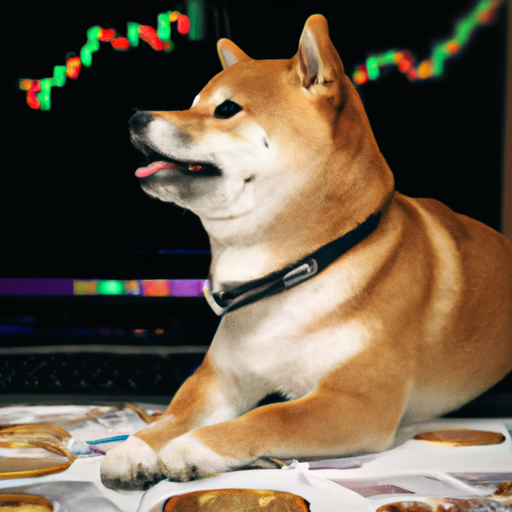

In [50]:
TWEET = True  #set this to True to actually post on Twitter
temperature = 1
top_p = 0.9
model =  "gpt-3.5-turbo"
max_tokens=1000

STOCK = 'DOGE'
prompt = f"Write a funny tweet written by a Shiba Inu excited about the stock ${STOCK}."

completion = openai.ChatCompletion.create(
      model=model, 
      messages=[{"role": "user", "content": prompt}],
      temperature = temperature,
      max_tokens= max_tokens,
      top_p = top_p 
    )
text = completion['choices'][0]['message']['content'].strip()

if "sorry" in text:
    print(f"Error: {text}")
else:
    print(f"Tweet:\n{tr.fill(text,width = 50)}")
    #Image generation
    response = openai.Image.create(
                prompt=text,
                n=1,
                size="512x512",
                )

    media_url =response["data"][0]["url"]
    if TWEET:
        print("Tweeting")
        Bot.tweet(text, oauth = oauth, media_url = media_url)    
    else: 
        print("Not tweeting anything")
        
    #save image 
    file_path = f'images/{STOCK}_{int(time.time())}.jpg'  # replace with your desired file path
    response = requests.get(media_url)        
    img = Image.open(BytesIO(response.content))
    display(img)
    img.save(file_path)

## Tweet about many stonks

We first load up today's stock movements.  Then we select the top movers and tweet about them.

In [20]:

stock_filename ='data/nasdaq_screener_1682359632668.csv'

df_stock = pd.read_csv(stock_filename)

df_stock = df_stock[df_stock['Market Cap']>0]
df_stock = df_stock.sort_values(by = '% Change', ascending = False)
df_stock.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
4215,LODE,Comstock Inc. Common Stock,$0.4536,0.0411,9.964%,46736745.0,United States,NaN,433990,Finance,Real Estate
5440,PEPG,PepGen Inc. Common Stock,$13.80,1.2500,9.96%,328190289.0,United States,2022.0,15949,Health Care,Biotechnology: Pharmaceutical Preparations
6486,SNTI,Senti Biosciences Inc. Common Stock,$1.05,0.0936,9.787%,46376436.0,United States,2021.0,678497,Health Care,Biotechnology: Pharmaceutical Preparations
6957,TOP,TOP Financial Group Limited Ordinary Shares,$6.87,0.6100,9.744%,240793500.0,Hong Kong,2022.0,691500,Finance,Investment Bankers/Brokers/Service
5621,PPSI,Pioneer Power Solutions Inc. Common Stock,$5.98,0.5300,9.725%,58409919.0,United States,NaN,246535,Industrials,Electrical Products


In [ ]:
temperature = 1
top_p = 0.9
model =  "gpt-3.5-turbo"
max_tokens=1000

tsleep_mean = 5  #mean sleep time in seconds
tweet_max = 6

Comstock Inc. Common Stock (LODE) moved 9.964% today
Tweet:
"Much wow, such excite! My humans invested in
$LODE and now I can finally afford ALL the treats!
Time to stock up and fill my Shiba belly 🐕📈🤑
#shibainu #stockmarket #investing #treatsfordays"
Tweeting


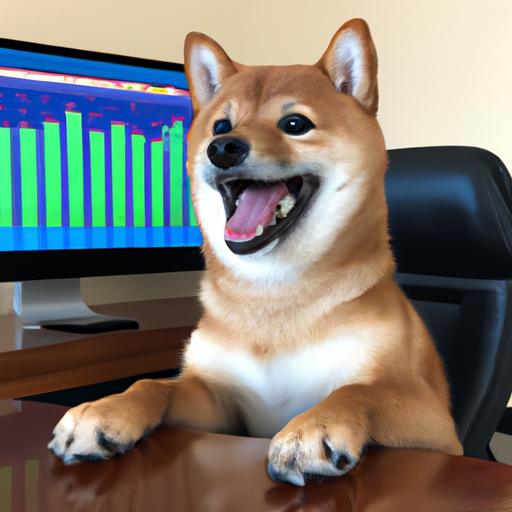

Sleeping for 5.65 seconds

PepGen Inc. Common Stock (PEPG) moved 9.96% today
Tweet:
"Wow, $PEPG is skyrocketing like a tennis ball in
a Shiba Inu's mouth! Time to cash in my kibble and
invest in some pupperoni stocks. #ShibaBillionaire
#ToTheMoon 🚀🐕💰"
Tweeting


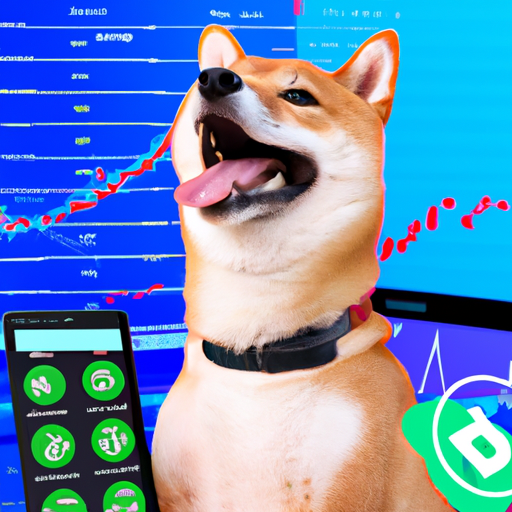

Sleeping for 5.66 seconds

Senti Biosciences Inc. Common Stock (SNTI) moved 9.787% today
Tweet:
"Wow, the stock $SNTI is going to the moon! Time
to bury some bones and hope for the best.
#shibainu #stocks #tothemoon 🚀🐶🦴"
Tweeting


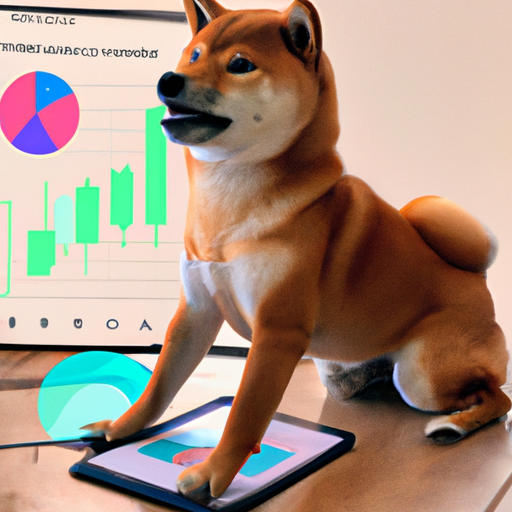

Sleeping for 5.92 seconds

TOP Financial Group Limited Ordinary Shares (TOP) moved 9.744% today
Tweet:
"Woof woof! I'm a Shiba Inu and even I know $TOP
is the top dog of stocks! Let's go to the moon,
baby! #ToTheTop #ShibaInuFinance"
Tweeting


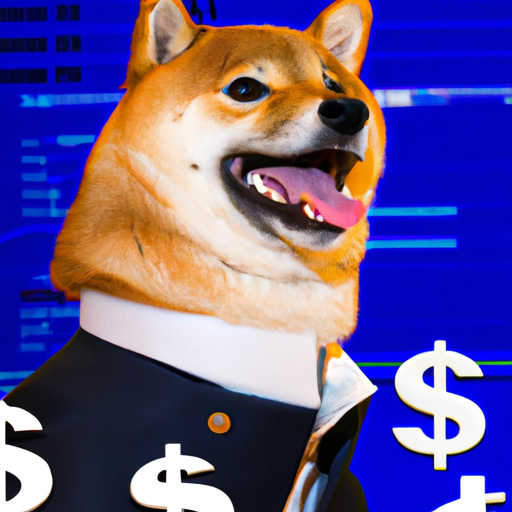

Sleeping for 6.11 seconds

Pioneer Power Solutions Inc. Common Stock (PPSI) moved 9.725% today
Tweet:
"Wow, I heard #PPSI is going up faster than my
tail wags when I see a treat! Time to invest and
get rich, much profit, very stock market, such
excite!" #ShibaStockTips #ToTheMoon 🚀🐾📈
Tweeting


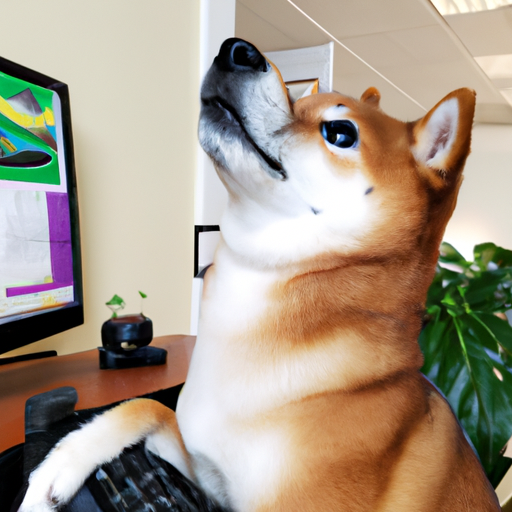

Sleeping for 6.71 seconds

Navios Maritime Holdings Inc. Common Stock (NM) moved 9.574% today
Tweet:
"Just heard the humans talking about #stock $NM
and I can't wait to invest my bones in it! Maybe
I'll finally be able to afford all the treats I
deserve #shibaproblems #tothemoon 🚀🐕"
Tweeting


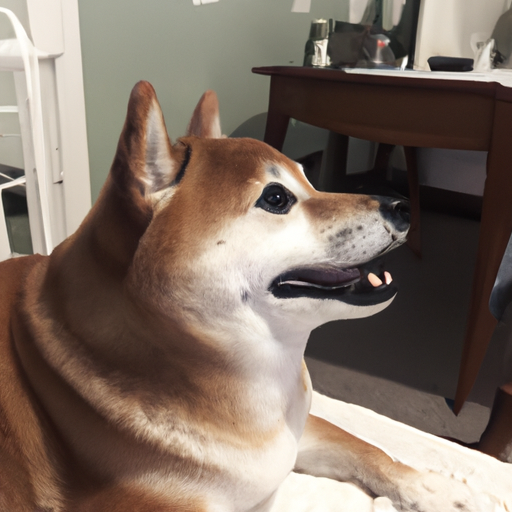

Sleeping for 5.89 seconds



In [41]:
TWEET = True


for index, row in df_stock.head(n=tweet_max).iterrows():
    print(f"{row.Name} ({row.Symbol}) moved {row['% Change']} today")
    prompt = f"Write a funny tweet written by a Shiba Inu excited about the stock ${row.Symbol}."

    completion = openai.ChatCompletion.create(
      model=model, 
      messages=[{"role": "user", "content": prompt}],
      temperature = temperature,
      max_tokens= max_tokens,
      top_p = top_p 
    )
    text = completion['choices'][0]['message']['content'].strip()
    if "sorry" in text:
        print(f"Error: {text}")
    else:
        print(f"Tweet:\n{tr.fill(text,width = 50)}")
        #Image generation
        response = openai.Image.create(
                    prompt=text,
                    n=1,
                    size="512x512",
                    )
        
        file_path = f'images/{row.Symbol}_{int(time.time())}.jpg'  # replace with your desired file path
        media_url =response["data"][0]["url"]
        if TWEET:
            print("Tweeting")
            Bot.tweet(text, oauth = oauth, media_url = media_url)    
        else: 
            print("Not tweeting anything")       
        #save image 
        response = requests.get(media_url)        
        img = Image.open(BytesIO(response.content))
        display(img)
        img.save(file_path)
        
        #sleep
        tsleep = tsleep_mean + np.random.uniform(low=0.0, high=2)
        print(f"Sleeping for {tsleep:.2f} seconds\n")
        time.sleep(tsleep)

